# Import Required Libraries

In [76]:
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
)


# Load in Dataset


In [77]:
def load_file(filepath):
    return pd.read_csv(filepath)

In [78]:
df = load_file("diabetes_data.csv")

# Verify datasets loaded in correctly

In [79]:
df.head(10) # Training set

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


# Data Cleaning

In [80]:
columns_to_keep = ['Age', 'Gender', 'Polyuria', 'sudden weight loss', 'visual blurring', 'Itching', 'Obesity', "class"]
df_filtered = df[columns_to_keep]

In [81]:
df_filtered

,Age,Gender,Polyuria,sudden weight loss,visual blurring,Itching,Obesity,class
0,40,Male,No,No,No,Yes,Yes,Positive
1,58,Male,No,No,Yes,No,No,Positive
2,41,Male,Yes,No,No,Yes,No,Positive
3,45,Male,No,Yes,No,Yes,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,No,Yes,No,Positive
516,48,Female,Yes,Yes,No,Yes,No,Positive
517,58,Female,Yes,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,Yes,Yes,No,Negative


# Data Visualisation

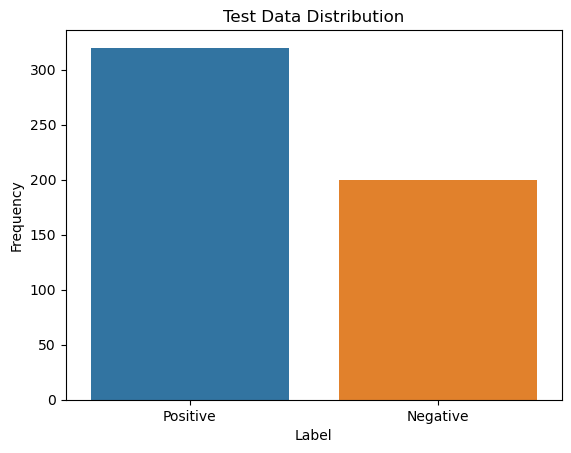

class
Positive    320
Negative    200
Name: count, dtype: int64

In [82]:
sns.countplot(x='class', data= df_filtered)
plt.title('Test Data Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()
df_filtered["class"].value_counts()

In [83]:
df_filtered.describe(include=['object'])

,Gender,Polyuria,sudden weight loss,visual blurring,Itching,Obesity,class
count,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2
top,Male,No,No,No,No,No,Positive
freq,328,262,303,287,267,432,320


# Model Implementation

In [84]:
X = df_filtered.drop('class', axis=1) 
y = df_filtered['class']

In [85]:
X_encoded = pd.get_dummies(X, drop_first=True) # encode the categorical columns as numerical values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42) # 80-20 test split

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # 80-20 validation split

# Bernoulli Naive Bayes Baseline

In [88]:
nb = BernoulliNB()

nb.fit(X_train, y_train)

y_val_pred = nb.predict(X_val)
print(classification_report(y_val, y_val_pred))

y_test_pred = nb.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.80      0.77        30
    Positive       0.88      0.85      0.87        54

    accuracy                           0.83        84
   macro avg       0.82      0.83      0.82        84
weighted avg       0.84      0.83      0.83        84

              precision    recall  f1-score   support

    Negative       0.77      0.82      0.79        33
    Positive       0.91      0.89      0.90        71

    accuracy                           0.87       104
   macro avg       0.84      0.85      0.85       104
weighted avg       0.87      0.87      0.87       104



# Logistic Regression Baseline

In [89]:
lr = LogisticRegression(max_iter = 10000)

lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)
print(classification_report(y_val, y_val_pred))

y_test_pred = lr.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.74      0.83      0.78        30
    Positive       0.90      0.83      0.87        54

    accuracy                           0.83        84
   macro avg       0.82      0.83      0.82        84
weighted avg       0.84      0.83      0.84        84

              precision    recall  f1-score   support

    Negative       0.78      0.85      0.81        33
    Positive       0.93      0.89      0.91        71

    accuracy                           0.88       104
   macro avg       0.85      0.87      0.86       104
weighted avg       0.88      0.88      0.88       104



# Implement our Bayesian Network

In [ ]:
model = BayesianNetwork([
    ('Age', 'Obesity'),
    ('Gender', 'Obesity'),
    ('Obesity', 'class'),
    ('Age', 'class'),  
    ('Polyuria', 'class'),
    ('sudden weight loss', 'class'),
    ('visual blurring', 'class'),
    ('Itching', 'class')
])

model.fit(df_filtered, estimator=MaximumLikelihoodEstimator)

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

evidence = {
    'Age': 40, 
    'Gender':  "Male", 
    'Polyuria': "No",
    'sudden weight loss': "No",
    'visual blurring': "No",
    'Itching': "No"
}

# Query the model for the probability of Diabetes
result = infer.query(variables=['class'], evidence=evidence)
print(result)
